<b><font size=20, color='#A020F0'>Homework 5</font></b>

#### In this homework you'll further explore MetPy and you'll get a chance to practice packaging code. This is your final homework assignment for this class!

<b><font color='red'>Due Date: 4 December 2024</font></b><br>(by the beginning of class)

<b>How you will turn in this assignment</b><br> When you are ready to turn in your homework, do the following steps:
1. Execute all cells in your notebook so that the results are visible, and save one more time. It is ok if you have code that you practiced with, but <b><u>make sure your final answers to each question are clearly marked so that your TA and I know what to grade</u></b>. (You can also collapse the code and outputs that you _don't_ want us to grade; options to collapse and expand code are in the 'View' menu in the upper left)
2. Open a terminal and navigate to your local `aos573_completed_assignments` repository and make a new directory called `completed_HW5`
3. Move your completed jupyter notebook <b><font color='red'>and your `hw5_skew_t` folder and its contents</font></b> (see 3.3) into this directory
4. `add` and `commit` the `completed_HW5` directory and its contents to your local `aos573_completed_assignments` repository
5. `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'>REMINDER: DO NOT TRACK OR PUSH THE DATA USED IN THE NOTEBOOK</font></b>
7. <font color='blue'><b>Celebrate!</b></font>

---

## Part 1: Reading in the data
The data we'll be using for this homework is a sounding from Springfield, Missouri on May 22, 2011, the day of the devastating Joplin, MO tornado. Twice a day at locations across the U.S., the National Weather Service (NWS) launches [radiosondes](https://www.weather.gov/upperair/factsheet) (on weather balloons) that measure various atmospheric properties including pressure, temperature, humidity, windspeed and direction, etc. The information collected from the radiosonde is known as an upper air sounding. You can get past sounding data from stations all over North America from this [sounding database](http://weather.uwyo.edu/upperair/sounding.html) from the University of Wyoming. You can also get present [sounding data](https://www.spc.noaa.gov/exper/soundings/) (and much more) from the [NWS Storm Prediction Center](https://www.spc.noaa.gov/). 

### Q1.1 Load the data
Using [this example](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html#sphx-glr-examples-upperair-wyoming-request-py) from [siphon](https://unidata.github.io/siphon/latest/index.html), read in the sounding data from Springfield, MO on May 22, 2011 at 12Z.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import metpy
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [79]:
date = datetime(2011, 5, 22, 12)
station = 'SGF'

In [80]:
ds = WyomingUpperAir.request_data(date, station)
print(ds.columns)

Index(['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed',
       'u_wind', 'v_wind', 'station', 'station_number', 'time', 'latitude',
       'longitude', 'elevation', 'pw'],
      dtype='object')


Your sounding data should contain the following variables:
    
1. `pressure`: the pressure in [hPa] 
2. `height`: the height in [m]
3. `temperature`: the temperature in [˚C]
4. `dewpoint`: the dewpoint temperature in [˚C]
5. `direction`: direction of the wind in [˚]
6. `speed`: the wind speed in [Kt]
7. `u_wind`: the zonal component of the wind in [Kt]
8. `v_wind`: the meridional component of the windin [Kt]
9. `station`: the station name
10. `station_number`: the station number
11. `time`: the time of the profile 
12. `latitude`: latitude of the station
13. `longitude`: longitude of the station 
14. `elevation`: elevation of the station in [m] 
15. `pw`: total precipitable water in [mm]

### Q1.2 Use metpy to add units to your data
Add units to each variable in the dataset except for time, station, station_number, latitude, and longitude

In [81]:
# ds = ds.metpy.quantify()
pressure = ds.pressure.values*units.hPa
height = ds.height.values*units.meter
temperature = ds.temperature.values*units.degC
dewpoint = ds.dewpoint.values*units.degC
direction = ds.direction.values*units.deg
speed = ds.speed.values*units.knots
u_wind = ds.u_wind.values*units.knots
v_wind = ds.v_wind.values*units.knots
elevation = ds.elevation.values*units.meters
pw = ds.pw.values*units.millimeter

---

## Part 2: Working with the data
In this section, you'll do some basic computations on your dataset and use this information to make a more complex Skew-T diagram. The metpy calculation section for [soundings](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#soundings) will be useful.

### Q2.1 Compute the pressure and temperature of the lifting condensation level
The lifting condensation level (LCL) is the level at which an air parcel becomes saturated. Use metpy's built-in function for computing the LCL, and use the temperature, dewpoint, and pressure from the first row of the data as your starting point.

In [82]:
lcl_pressure, lcl_temperature = metpy.calc.lcl(pressure[0], temperature[0], dewpoint[0])

### Q2.2 Calculate the parcel profile
Use metpy's [parcel_profile](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.parcel_profile.html#metpy.calc.parcel_profile) to calculate a parcel profile starting at the same temperature and dewpoint as you did in Q2.1 and convert the result to ˚C.

><b><font color='red'>Note: </font></b> Python will most likely give you an error when you try to compute the parcel profile. It will be your job to read the output of the error and to figure out a way to work around this by digging into your profile data (keep in mind you need not apply a filter like python suggests in the error message although you can if you want)

In [83]:
parcel = metpy.calc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')


/tmp/ipykernel_110/3516269388.py:1: UserWarning: Duplicate pressure(s) [27.7] hPa provided. Output profile includes duplicate temperatures as a result.
  parcel = metpy.calc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')


### Q2.3 Compute the vector components of the wind
Given the windspeed and direction, compute the u and v components of the wind using metpy's [wind_components()](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.wind_components.html#metpy.calc.wind_components) function. 

Make a quick line plot of the differences between the calculcated u and v wind components and their respective values provided in the sounding data. Your plot should have two differently-colored lines, one representing each difference. Don't bother to make the plot pretty or add labels.

How do these calculated quantities compare to the u_wind and v_wind variables provided in the sounding data?

In [84]:
u, v = metpy.calc.wind_components(speed, direction)

### Q2.4 Plot a Skew-T with your data and your results from Q2.1 and Q2.2
Make a Skew-T diagram with the following parameters. You will need to refer to metpy's [SkewT documentation](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT) to be able to do some of the following:
1. Plot the air temperature profile
2. Plot the dewpoint profile
3. Plot wind barbs on the side of your Skew T (you can use u_wind and v_wind from the sounding data)
4. Plot a star at the location of the lifting condensation level (make it big enough to be visible)
5. Plot the parcel profile
6. Plot the dry and moist adiabats
7. Shade the areas of CAPE (Convective Available Potential Energy) and CIN (Convective Inhibition)
8. Set the y-axis limits to be 1000 hPa (lower limit) and 100 hPa (upper limit). Choose a reasonable set of x-axis limits. Do not forget to add  x- and y-axis labels
9. Add two titles to your plot: one that provides the location of the data and another that provides the date and time 

Please be thoughtful about the colors you use for the lines in 1,2,and 5-7, and be sure to make your plot colorblind-friendly. You may also want to thin out your wind barbs so that they are plotted every few points. It's up to you to decide what you think looks nicest. 

In [85]:
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT

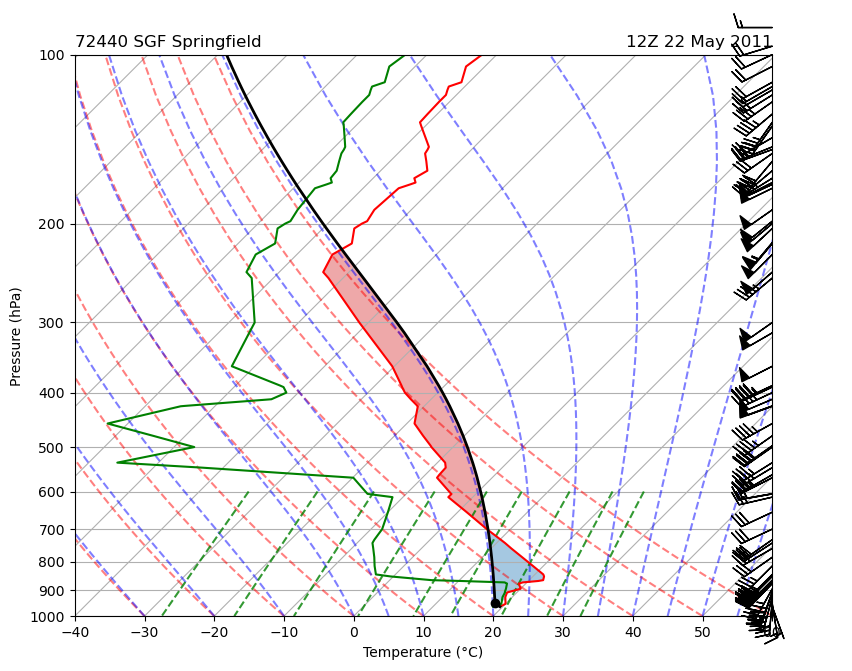

In [93]:
fig = plt.figure(figsize=(9, 9))
# add_metpy_logo(fig, 115, 100)
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(pressure, temperature, 'r')
skew.plot(pressure, dewpoint, 'g')
skew.plot_barbs(pressure, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Set some better labels than the default
skew.ax.set_xlabel(f'Temperature ({temperature.units:~P})')
skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})')

skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

skew.plot(pressure, parcel, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(pressure, temperature, parcel, dewpoint)
skew.shade_cape(pressure, temperature, parcel)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.title('72440 SGF Springfield', loc='left')
plt.title('12Z 22 May 2011', loc='right')
# Show the plot
plt.show()

---

## Part 3: Packaging your code
In this section you'll use what you did in the first two parts of the assignment to create a module that plots a Skew-T diagram given a sounding like the one you used for this assignment. Your module should have appropriate docstrings, and you'll then turn it into a package by creating a new directory with the structure and contents that we talked about in class. 

><b><font color='red'>Please note: </font> I will be testing your code (by installing the package you create and importing your module!!) on a random sounding profile from the Wyoming database, so do your best to make it as general as possible. <u>That means making sure the code for your module can handle missing values as well as duplicate and non-monotonic pressures!</u></b> 

To help make sure you cover everything, we'll go through this step-by-step:

### 3.1 Write a function for making a skew-T diagram
Write a function called `my_skew_t` that <b>retrieves and reads in _any_ sounding</b> from the U. Wyoming upper air sounding database and plots a Skew-T diagram of the retrieved data. The plot your function creates should be exactly the same as the plot you created in Q2.4, excluding the marker for the lifting condensation level.

><b><font color='green'>Hint:</font></b> It is 100% ok to wrap other, pre-existing functions into your `my_skew_t` module

><b><font color='red'>Note:</font></b> Beware of certain hard-coded values in your function! These will stay the same even if you apply your function to a new dataset, and you may not want that! Some hard-coded values are fine though, such as the pressure limits (1000 to 100) or colors of lines, etc.

In [94]:
"""
A Python module for creating Skew-T diagrams from University of Wyoming sounding data
"""
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT

def my_skew_t(date, station):
    """
    Creates a Skew-T diagram using MetPy.

    Args:
        date: (year, month, day, Z time)
        station: 3-letter station identifier

    Returns:
        matplotlib.figure.Figure: The Skew-T figure.
    """
    # Read in data
    ds = WyomingUpperAir.request_data(date, station)

    # Add units
    pressure = ds.pressure.values*units.hPa
    height = ds.height.values*units.meter
    temperature = ds.temperature.values*units.degC
    dewpoint = ds.dewpoint.values*units.degC
    direction = ds.direction.values*units.deg
    speed = ds.speed.values*units.knots
    u_wind = ds.u_wind.values*units.knots
    v_wind = ds.v_wind.values*units.knots
    elevation = ds.elevation.values*units.meters
    pw = ds.pw.values*units.millimeter

    # Calculate lcl
    lcl_pressure, lcl_temperature = metpy.calc.lcl(pressure[0], temperature[0], dewpoint[0])

    # Calculate parcel
    parcel = metpy.calc.parcel_profile(pressure, temperature[0], dewpoint[0]).to('degC')

    # Find u and v components of wind
    u, v = metpy.calc.wind_components(speed, direction)

    # Create figure
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=45)

    # Plot temperature and dewpoint
    skew.plot(pressure, temperature, 'r') 
    skew.plot(pressure, dewpoint, 'g') 

    # Plot wind barbs
    skew.plot_barbs(pressure, u, v)

    # Set axis limits and labels
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-40, 60)
    skew.ax.set_xlabel(f'Temperature ({temperature.units:~P})')
    skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})')

    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

    skew.plot(pressure, parcel, 'k', linewidth=2)

    # Shade areas of CAPE and CIN
    skew.shade_cin(pressure, temperature, parcel, dewpoint)
    skew.shade_cape(pressure, temperature, parcel)

    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()

    plt.title(station, loc='left')
    plt.title(date, loc='right')
    # Show the plot
    
    return fig

In [88]:
date = datetime(2022, 5, 26, 12)
station = 'MPX'

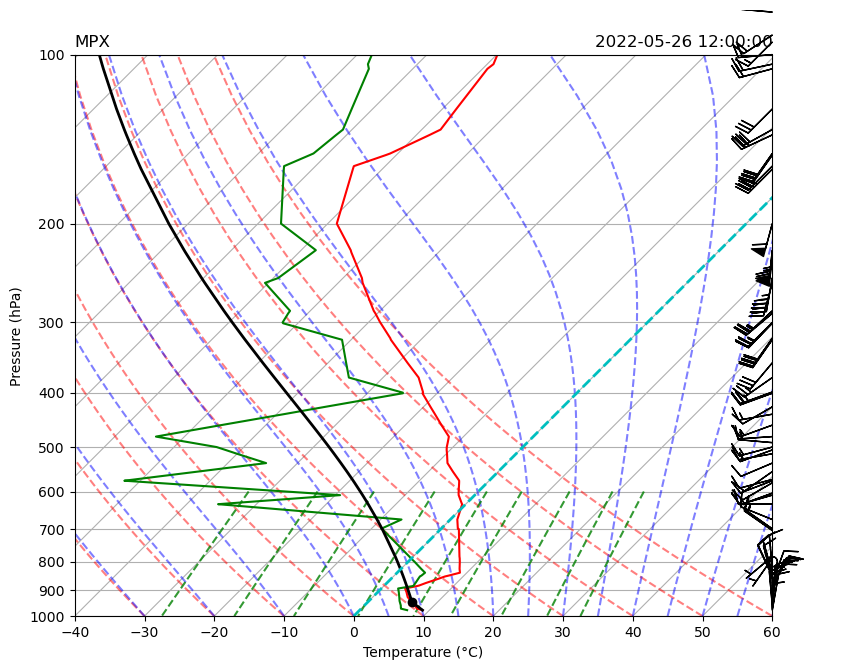

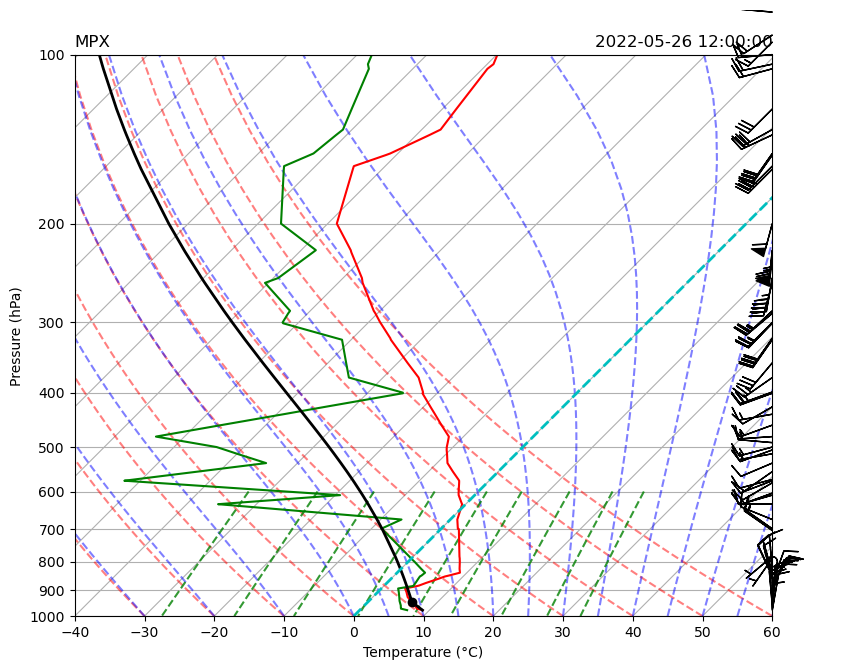

In [89]:
my_skew_t(date, station)

### 3.2 Turn your function into a module
Once you have your function and you are sure it works, copy it to a file called `make_skew_t.py`. <b>Make sure your .py file has complete and properly formatted docstrings and that all of the necessary packages that you need to import are there as well.</b> I should be able to tell what your function is doing only with the information you provide in the docstrings and comments, <u>and you will be graded accordingly.</u>

### 3.3 Package your code
Create a new folder called `hw5_skew_t` to house your code. Within `hw5_skew_t`, set up the correct directories and files for a python package (like we learned in class). You can create this folder in your `completed_HW5` directory, as you'll need to move it there to turn it in anyway. You should include a `tests` directory in `hw5_skew_t`, but go ahead and leave it empty.

><b><font color='red'>Reminder:</font></b> I will be testing your packaged code to see if it works. <b>That means you will need to have the correct package directory structure for me to be able to 1) <u>install</u> and then 2) <u>import</u> and use your module!</b> As a test, I recommend that you create your own new environment (either by cloning the class environment or creating a new, pared down version of our class environment with only the packages and dependencies you need for your module to work) to see if you can successfully INSTALL and import your module and use it.


#### <font color='green'>**BONUS (OPTIONAL)**</font>
+1 bonus point on this problem if you are able to correctly upload your package to [Test PyPI](https://test.pypi.org/) and I am able to install it from there and then use your module. Two things if you attempt this:
1. You need to make sure your package name is unique (an easy way to do that is to append your last name to your package name)
2. <u>Provide the pip install command from Test PyPI below</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

---

In [2]:
from make_skew_t.make_skew_t import my_skew_t

In [3]:
date = datetime(2022, 5, 26, 12)
station = 'MPX'

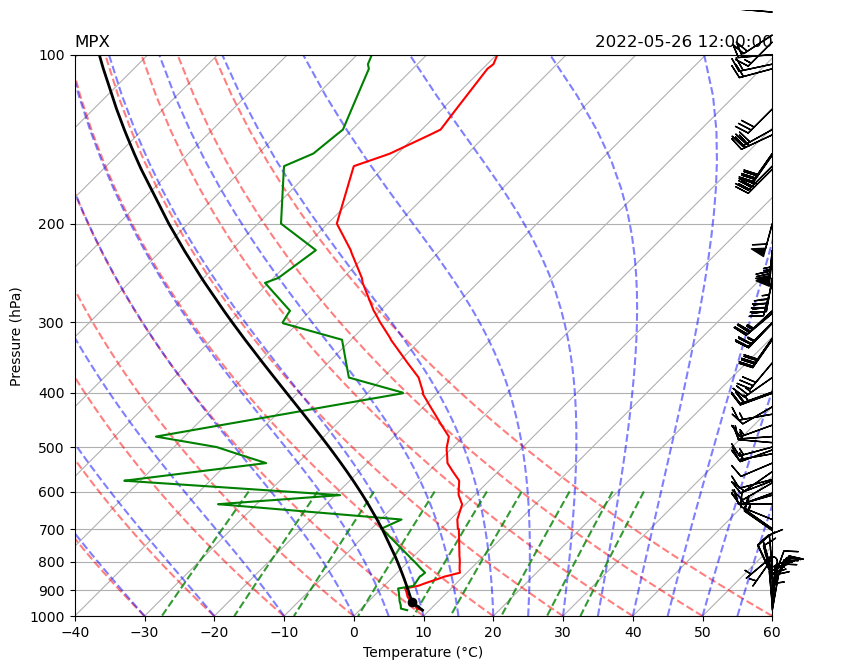

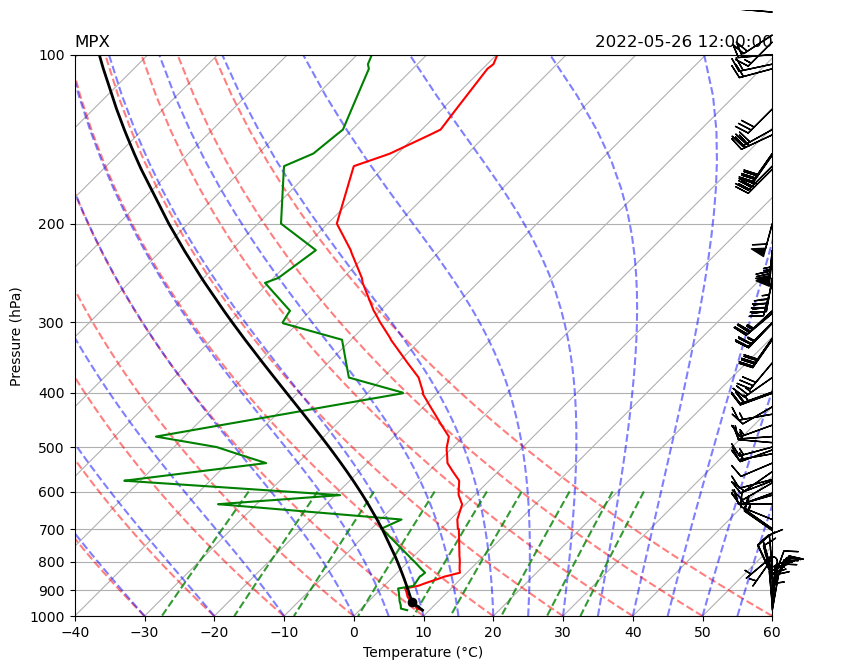

In [4]:
my_skew_t(date,station)